## Counting paths with dynamic programming
Count the number of paths from (0,0) to (m,n) along a unitary grid, assuming all steps are either north or east.


## Algorithm description
The paths can be classified depending on whether the last step is horizontal of vertical. 
This gives a recursion:

F(m,n)=F(m-1,n)+F(m,n-1).

In [71]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations
import matplotlib.patches as patches
from math import comb

## Choose colors

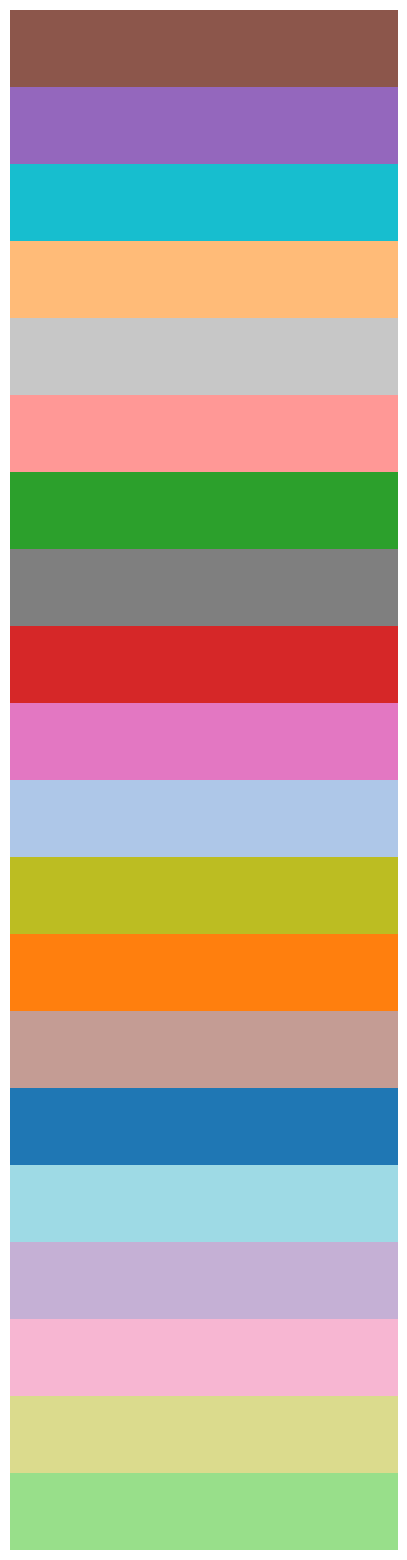

In [239]:
cmap = plt.cm.tab20
colors = [cmap(i) for i in range(20)]
random.shuffle(colors)
          
def display_colors(color_list):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(5, len(color_list)))

    # Display each color as a rectangle
    for idx, color in enumerate(color_list):
        rect = patches.Rectangle((0, idx), 5, 1, linewidth=1, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Adjust the view
    ax.set_xlim(0, 3)
    ax.set_ylim(0, len(color_list))
    ax.axis('off')  # Hide the axis
    plt.show()
display_colors(colors)

## A function that lists all paths

In [241]:
## This function returns a list of all the paths ffom A to B.
def F(m, n):
    # initialize a dictionary where intermediate results will be stored
    G = dict()
    G[(0,0)] = set()

    # Initialize for m > 0 and n=0
    for j in range(m+1):
        G[(j,0)] = [[(l,0,l+1,0) for l in range(j)]]

    # Initialize for n > 0 and m=0
    for j in range(n+1):
        G[(0,j)] = [[(0,l,0,l+1) for l in range(j)]]
    # The recursive step
    for i in range(1, m+1):
        for k in range(1, n+1):
            v=[(i-1,k,i,k)]
            h=[(i,k-1,i,k)]
            G[(i,k)] = [path +v for path in G[(i-1,k)]]+[path +h for path in G[(i,k-1)]]

    return G[(m,n)]


## Animate path counting

In [279]:

def animate_paths(m, n):
    fig, ax = plt.subplots()
    #Setting the background colors
    ax.set_facecolor('silver')
    fig.set_facecolor('silver')
    # Choose margin size
    margin = 1
    # The frames are the list of paths
    frames = F(m, n)
    line_width = 2  # Define your line_width value
    ax.set_title("Counting Paths",fontsize=20) ## make title
    # Draw n+1 horizontal lines
    for y in range(n+1):
        ax.plot([0, m], [y, y], color='black', linestyle='-', linewidth=line_width)

    # Draw m+1 vertical lines
    for x in range(m+1):
        ax.plot([x, x], [0, n], color='black', linestyle='-', linewidth=line_width)

    ax.set_xlim([-margin, m + margin])
    ax.set_ylim([-margin, n + margin])
    ax.set_aspect("equal")

    lines = []  # This list will hold the line objects for each frame
    counter_text = ax.text(0.4, 0.1, '', transform=ax.transAxes, ha='left', va='top',color="black")# Make a counter
    
    def update(frame):
        #Choose the color of the path
        index=frames.index(frame)
        color=colors[index%(len(colors))]
        
        # Remove lines from the previous frame
        for line in lines:
            line.remove()
        lines.clear()  # Clear the list

        # Draw new lines for the current frame
        for step in frame:
            line, = ax.plot([step[0], step[2]], [step[1], step[3]], marker='o', linestyle='-', color=color, linewidth=2*line_width)
            lines.append(line)
        # The number of the path is:    
        number=str(index+1)
        # Update counter
        counter_text.set_text(f"Path Count: {number}")

    ani = FuncAnimation(fig, update, frames=frames, repeat=False)
    ani_jshtml = ani.to_jshtml()
    # Display the animation
    return(HTML(ani_jshtml))

# Sample call to your function (assuming F is defined elsewhere in your code)
# animate_paths(5, 5)


In [281]:
comb(8,4)

70

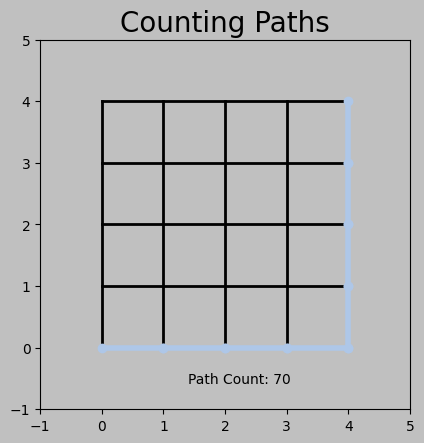

In [282]:
animate_paths(4,4)